In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


In [2]:
sns.set(rc={'figure.figsize':(16,12)})

In [4]:
data = pd.read_csv("../Data/data.csv")
data["date"] = data["day"].astype(str)+"-"+data["month"].astype(str)+"-"+data["year"].astype(str)
data["date"] = pd.to_datetime(data["date"],format="%d-%m-%Y")
data.sort_values(["year","month","day"],ascending=False).head()

,producto,year,month,day,precio_min,precio_max,precio_mean,date
0,CEBOLLA CABEZA BLANCA NACIONAL,2022,4,30,1.5,1.9,1.73,2022-04-30
1,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022,4,30,1.4,1.9,1.60,2022-04-30
2,CEBOLLA CHINA (CRIOLLA/SERRANA),2022,4,30,1.5,2.0,1.75,2022-04-30
3,PAPA AMARILLA,2022,4,30,1.4,1.9,1.68,2022-04-30
4,PAPA BLANCA/VALLE/OTROS,2022,4,30,1.4,1.8,1.58,2022-04-30


In [4]:
data["producto"].value_counts()

PAPA YUNGAY                                 3052
CEBOLLA CHINA (CRIOLLA/SERRANA)             3052
PAPA AMARILLA                               3052
PAPA CANCHAN                                3052
PAPA COLOR/VALLE/OTROS                      3052
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U    3052
CEBOLLA CABEZA BLANCA NACIONAL              3051
PAPA UNICA                                  3051
CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL    3051
PAPA NEGRA ANDINA                           3050
PAPA BLANCA/VALLE/OTROS                     3050
PAPA PERUANITA (INJERTO)                    3049
PAPA HUAMANTANGA                            3029
PAPA PERRICHOLI                             2238
PAPA AMARILIS                                 88
PAPA TOMASA                                    9
PAPA CAPIRO                                    7
Name: producto, dtype: int64

In [5]:
data = data[(data.producto != "PAPA AMARILIS") & (data.producto != "PAPA CAPIRO") & (data.producto != "PAPA TOMASA") & (data.producto != "PAPA PERRICHOLI")]

<AxesSubplot:ylabel='Precio Promedio (Soles)'>

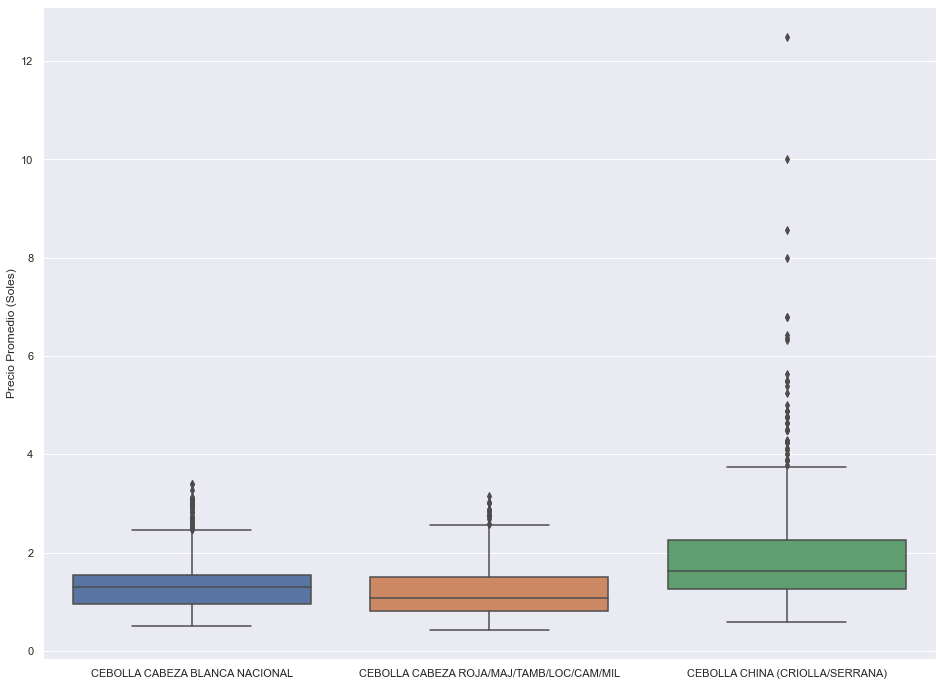

In [6]:
cebollas = data[data.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=cebollas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
ax

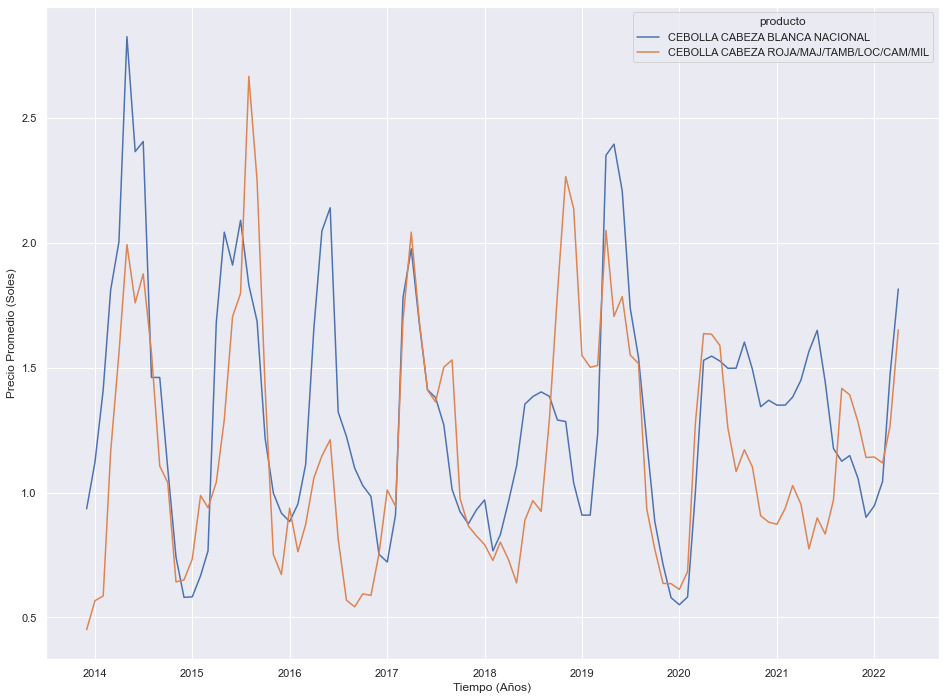

In [7]:
cebollas = cebollas[~cebollas.producto.astype(str).str.contains("CHINA")]
monthAvg = cebollas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")
monthAvg = monthAvg[monthAvg.producto.astype(str).str.contains("CEBOLLA")]
ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto")
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
fig = ax.get_figure()
fig.savefig("cebolla.png")


[Text(0, 0, 'PAPA AMARILLA'),
 Text(1, 0, 'PAPA BLANCA/VALLE/OTROS'),
 Text(2, 0, 'PAPA COLOR/VALLE/OTROS'),
 Text(3, 0, 'PAPA HUAYRO '),
 Text(4, 0, 'PAPA HUAMANTANGA'),
 Text(5, 0, 'PAPA NEGRA ANDINA'),
 Text(6, 0, 'PAPA PERUANITA '),
 Text(7, 0, 'PAPA YUNGAY'),
 Text(8, 0, 'PAPA UNICA'),
 Text(9, 0, 'PAPA CANCHAN')]

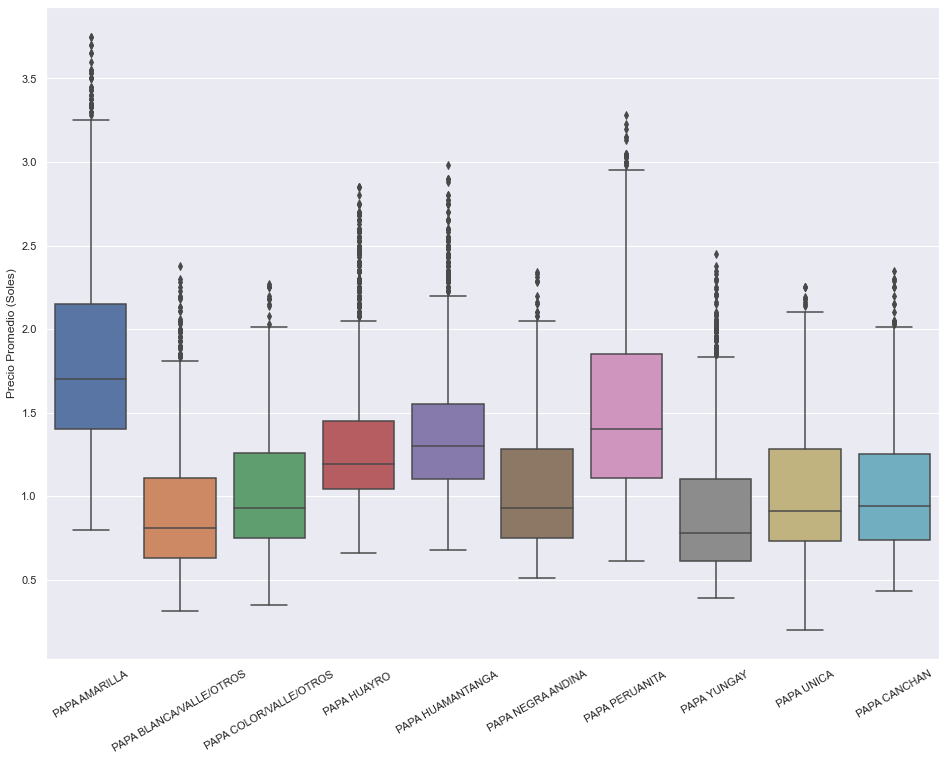

In [8]:
papas = data[data.producto.astype(str).str.contains("PAPA")]
ax = sns.boxplot(x="producto",y="precio_mean",data=papas)
ax.set_xlabel("")
ax.set_ylabel("Precio Promedio (Soles)")
ax.set_xticklabels([label.get_text().split("(")[0] for label in ax.get_xticklabels()],rotation=30)

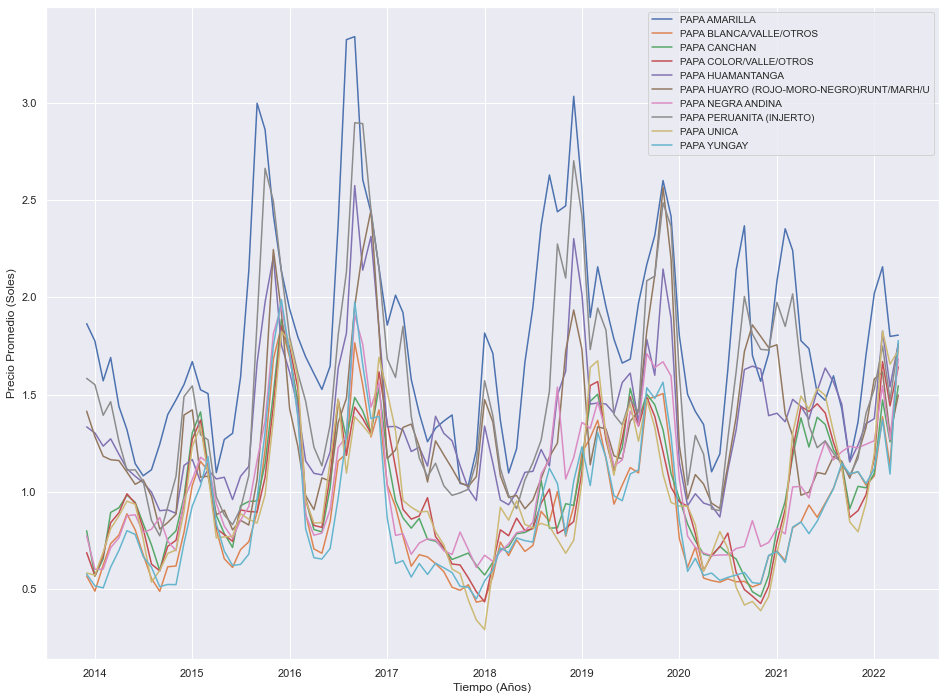

In [18]:
monthAvg = papas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")

ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto", )
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("papas.png")

In [9]:
papas_g1 = papas[(papas["producto"].astype(str).str.contains("HUAYRO")) | (papas["producto"].astype(str).str.contains("PERUANITA")) | (papas["producto"].astype(str).str.contains("HUAMANTANGA")) | (papas["producto"].astype(str).str.contains("AMARILLA"))]
papas_g2 = papas[~((papas["producto"].astype(str).str.contains("HUAYRO")) | (papas["producto"].astype(str).str.contains("PERUANITA")) | (papas["producto"].astype(str).str.contains("HUAMANTANGA")) | (papas["producto"].astype(str).str.contains("AMARILLA")))]

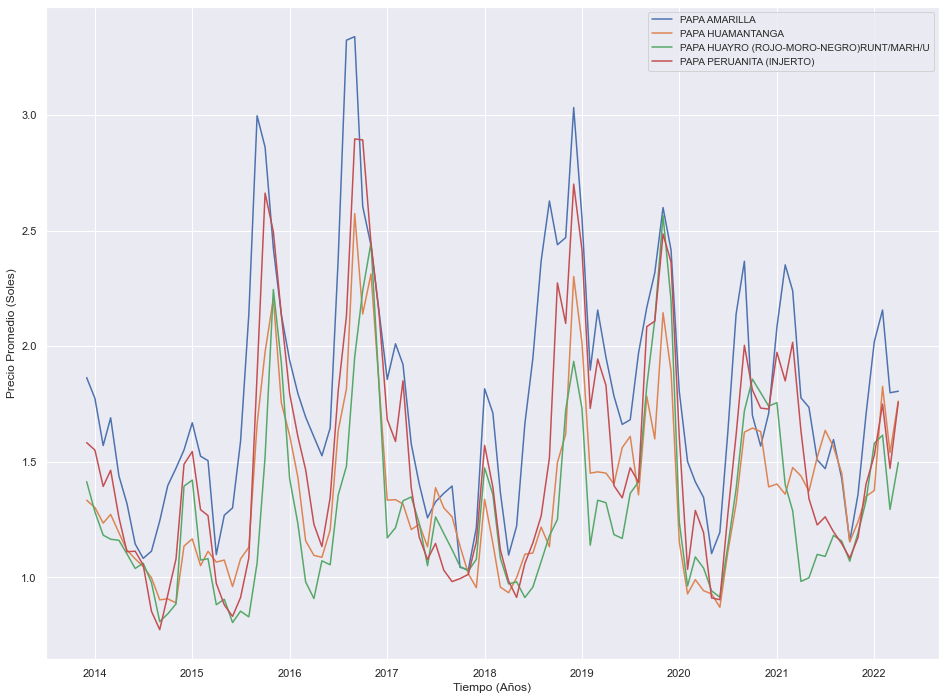

In [19]:
monthAvg = papas_g1.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")

ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto", )
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("papas_g1.png")

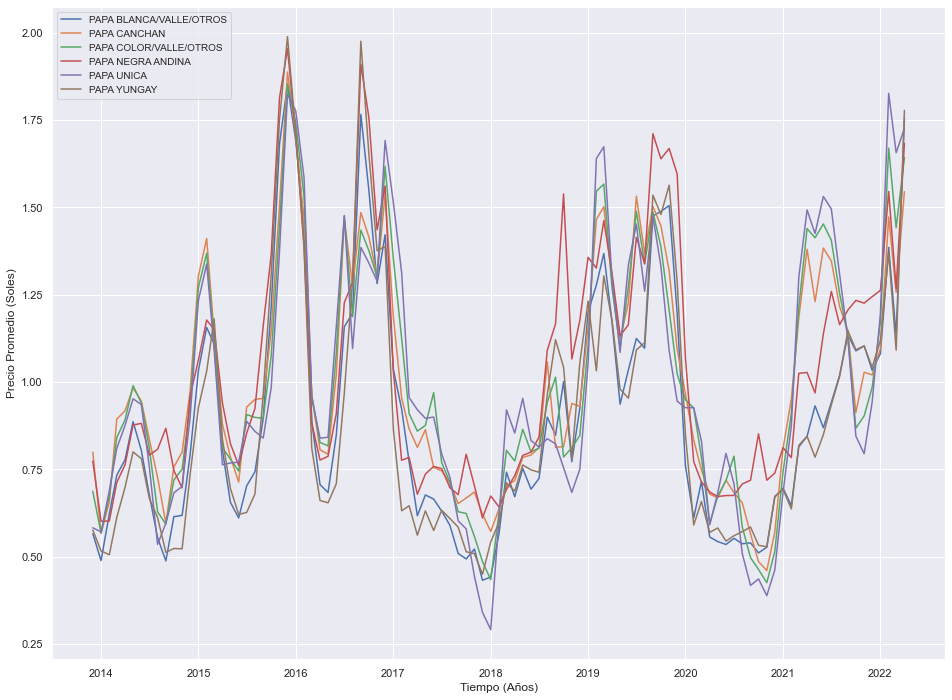

In [11]:
monthAvg = papas_g2.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
monthAvg["date"] = monthAvg["month"].astype(str)+"-"+monthAvg["year"].astype(str)
monthAvg["date"] = pd.to_datetime(monthAvg["date"],format="%m-%Y")

ax = sns.lineplot(data=monthAvg,x="date", y="precio_mean", hue="producto", )
ax.set_xlabel("Tiempo (Años)")
ax.set_ylabel("Precio Promedio (Soles)")
plt.legend(fontsize="10")
fig = ax.get_figure()
fig.savefig("papas_g2.png")

In [12]:
papas.groupby("producto").describe()["precio_mean"]

,count,mean,std,min,25%,50%,75%,max
producto,,,,,,,,
PAPA AMARILLA,3052.0,1.800111,0.548105,0.80,1.40,1.70,2.1500,3.75
PAPA BLANCA/VALLE/OTROS,3050.0,0.903390,0.351882,0.31,0.63,0.81,1.1075,2.38
PAPA CANCHAN,3052.0,1.005616,0.329483,0.43,0.74,0.94,1.2500,2.35
PAPA COLOR/VALLE/OTROS,3052.0,1.003994,0.350133,0.35,0.75,0.93,1.2600,2.27
PAPA HUAMANTANGA,3029.0,1.368013,0.376896,0.68,1.10,1.30,1.5500,2.98
PAPA HUAYRO (ROJO-MORO-NEGRO)RUNT/MARH/U,3052.0,1.304430,0.403949,0.66,1.04,1.19,1.4500,2.85
PAPA NEGRA ANDINA,3050.0,1.040511,0.356097,0.51,0.75,0.93,1.2800,2.34
PAPA PERUANITA (INJERTO),3049.0,1.518337,0.521776,0.61,1.11,1.40,1.8500,3.28
PAPA UNICA,3051.0,0.994648,0.386825,0.20,0.73,0.91,1.2800,2.25


In [13]:
cebollas.groupby("producto").describe()["precio_mean"]

,count,mean,std,min,25%,50%,75%,max
producto,,,,,,,,
CEBOLLA CABEZA BLANCA NACIONAL,3051.0,1.321731,0.490374,0.51,0.95,1.30,1.55,3.40
CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,3051.0,1.172452,0.483058,0.43,0.80,1.08,1.50,3.15


In [14]:
papas_g1_processed = papas_g1.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
papas_g2_processed = papas_g2.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()
cebollas_processed = cebollas.groupby(["producto","year","month"]).agg({"precio_mean": "mean"}).reset_index()

papas_g1_processed["month"] = papas_g1_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
papas_g2_processed["month"] = papas_g2_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
cebollas_processed["month"] = cebollas_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))

papas_g1_processed["date"] = papas_g1_processed["year"].astype(str)+"-"+papas_g1_processed["month"].astype(str)
papas_g2_processed["date"] = papas_g2_processed["year"].astype(str)+"-"+papas_g2_processed["month"].astype(str)
cebollas_processed["date"] = cebollas_processed["year"].astype(str)+"-"+cebollas_processed["month"].astype(str)

papas_g1_processed[["producto","date","precio_mean"]].to_csv("../Data/papas_g1.csv", index=False)
papas_g2_processed[["producto","date","precio_mean"]].to_csv("../Data/papas_g2.csv", index=False)
cebollas_processed[["producto","date","precio_mean"]].to_csv("../Data/cebollas.csv", index=False)


In [15]:
# papas_g1_processed = papas_g1
# papas_g2_processed = papas_g2
# cebollas_processed = cebollas

# papas_g1_processed["month"] = papas_g1_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
# papas_g2_processed["month"] = papas_g2_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
# cebollas_processed["month"] = cebollas_processed["month"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))

# papas_g1_processed["day"] = papas_g1_processed["day"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
# papas_g2_processed["day"] = papas_g2_processed["day"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))
# cebollas_processed["day"] = cebollas_processed["day"].apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))

# papas_g1_processed["date"] = papas_g1_processed["year"].astype(str)+"-"+papas_g1_processed["month"].astype(str)+"-"+papas_g1_processed["day"].astype(str)
# papas_g2_processed["date"] = papas_g2_processed["year"].astype(str)+"-"+papas_g2_processed["month"].astype(str)+"-"+papas_g2_processed["day"].astype(str)
# cebollas_processed["date"] = cebollas_processed["year"].astype(str)+"-"+cebollas_processed["month"].astype(str)+"-"+cebollas_processed["day"].astype(str)

# papas_g1_processed[["producto","date","precio_mean"]].to_csv("../Data/papas_g1.csv", index=False)
# papas_g2_processed[["producto","date","precio_mean"]].to_csv("../Data/papas_g2.csv", index=False)
# cebollas_processed[["producto","date","precio_mean"]].to_csv("../Data/cebollas.csv", index=False)


In [16]:
cebollas_processed[["producto","date","precio_mean"]]

,producto,date,precio_mean
0,CEBOLLA CABEZA BLANCA NACIONAL,2013-12,0.935161
1,CEBOLLA CABEZA BLANCA NACIONAL,2014-01,1.120645
2,CEBOLLA CABEZA BLANCA NACIONAL,2014-02,1.411071
3,CEBOLLA CABEZA BLANCA NACIONAL,2014-03,1.810968
4,CEBOLLA CABEZA BLANCA NACIONAL,2014-04,2.003667
...,...,...,...
197,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2021-12,1.140323
198,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022-01,1.142258
199,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022-02,1.118519
200,CEBOLLA CABEZA ROJA/MAJ/TAMB/LOC/CAM/MIL,2022-03,1.265161
